In [1]:
# setup
from Board import set_ratio # used only in these notebooks
set_ratio(2)                # to make the boards a bit smaller

# Drawing Board Games from Ascii

This is a Python tool to make it easy to translate boards is ascii textual format in SVG files.

There are two different tools, corresponding to different files, one for orthogonal (i.e., rectangle-shaped) boards, and another for hexagonal boards.

To simplest approach is to use classes `Sq` and `Hex`.

Examples of use:

In [2]:
from Board import Sq

Class `Sq` receives a board description, or a list of moves. It makes diagrams using Go-like or Chess-like boards:

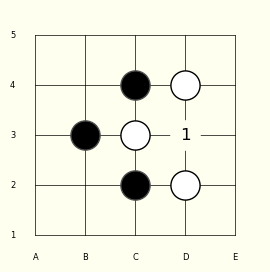

In [3]:
ko = """
. . . . .
. . x o .
. x o 1 .
. . x o .
. . . . .
"""

Sq(ko);

The diagram is saved in the same folder as a SVG file.

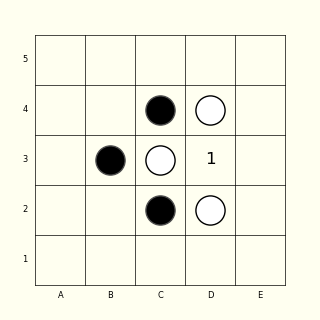

In [4]:
Sq(ko, go_like=False, filename='ko.svg');

It's possible to represent color stones directly:

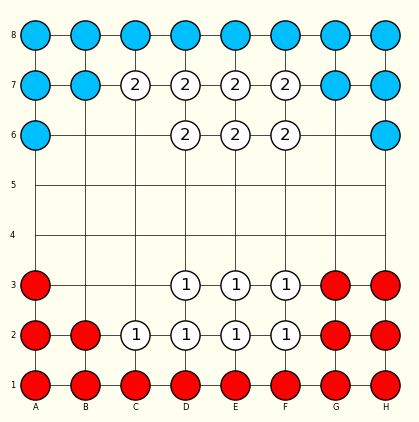

In [5]:
red_white_blue = """
l l l l l l l l  
l l o2 o2 o2 o2 l l  
l . .  o2 o2 o2 . l  
. . . . . . . . 
. . . . . . . .  
r . .  o1 o1 o1 r r  
r r o1 o1 o1 o1 r r 
r r r r r r r r 
"""

Sq(red_white_blue, filename='2026_02_Red_White_Blue_setup.svg');

The class also accepts a list of moves (must set parameter `size` with the board size):

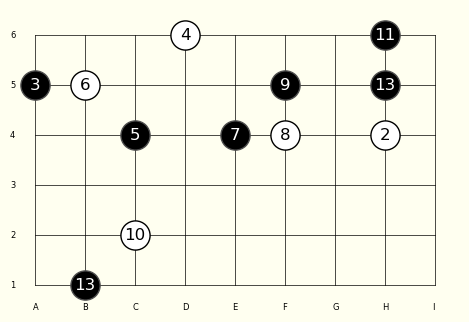

In [6]:
# for a multi-move turn, separate moves with a comma
# for captures, use :
match = """
d3 h4 a5
d6    c4
b5    e4
f4    f5
c2    h6
g6    h5,b1:d3,g6
"""

Sq(match, size=(6,9));

It's possible to define the order of stone placement:

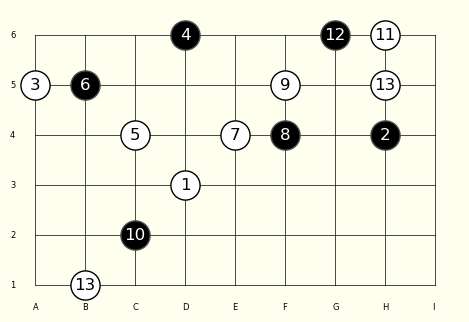

In [7]:
match = """
d3 h4 a5
d6    c4
b5    e4
f4    f5
c2    h6
g6    h5,b1\
"""

# white starts first
Sq(match, size=(6,9), players='ox');

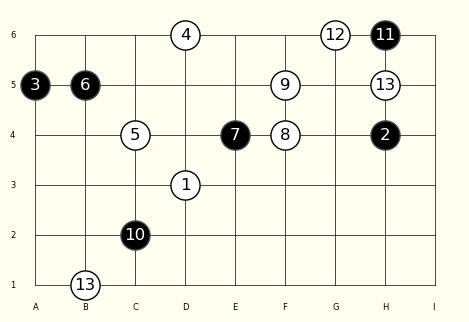

In [8]:
# white starts first, using a 122... sequence
Sq(match, size=(6,9), players='oxxo');

It's possible to represent stacks using the following syntax: `[abcd` where each letter represents a possible color (suggestion: avoid stacks with black stones)

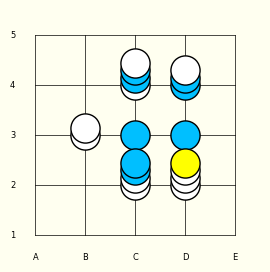

In [9]:
stacks = """
.   .   .     .     .
.   .   [ollo [llo  .
.   [oo [l    l     .
.   .   [ooll [oooy .
.   .   .     .     .
"""

Sq(stacks);

The class `Hex` just accepts textual boards:

In [10]:
from HexagonalBoard import Hex

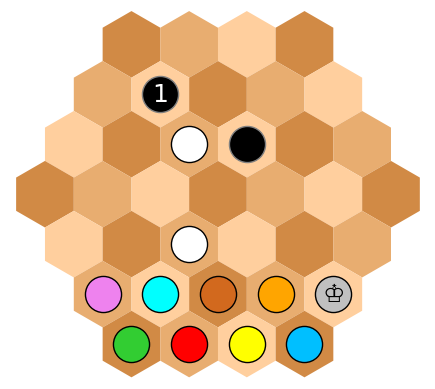

In [11]:
board = """
   . . . .
  . x1 . . .
 . . o x . .
. . . . . . .
 . . o . . .
  p c h n s♔
   g r y l
"""

Hex(board);

Hexagonal boards can also have a square-liked shape:

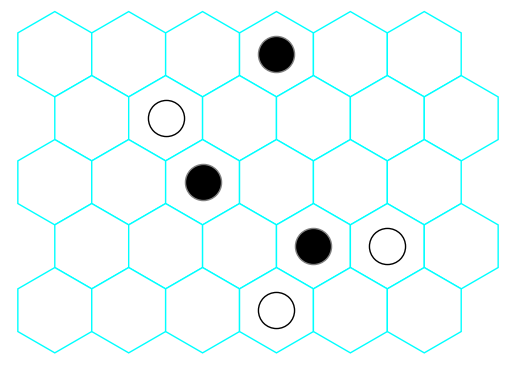

In [52]:
hex = """
 . . . x . . 
  . o . . . . 
  . . x . . . 
   . . . x o .
  . . . o . . 
"""

# it's also possible to configure the board colors
Hex(hex, square_like=True,
    hexcolor='white', edgecolor='cyan', background='white');

Stack notation also work in hexagonal boards:

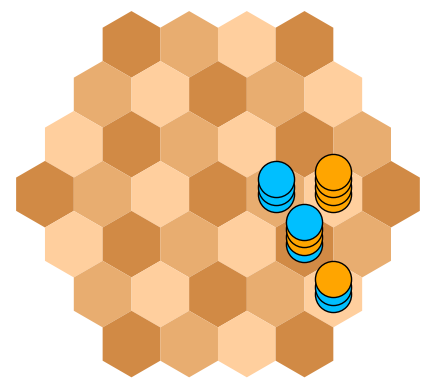

In [57]:
board = """
   . . . .
  . . . . .
 . . . . . .
. . . . [lll [nnnn .
. . . . [lnnl .
 . . . . [lln
  . . . .
"""

Hex(board);

---

These two modules allow for more flexibility, but users need to deal with more detail.

The next two sections show what are those details, and what they can do more.

## Orthogonal Boards

The Python module exports the following functions:

In [14]:
from Board import squares, intersections, draw_board, read_game, board2string

Let's see one by one.

The most important is `draw_board`:

In [15]:
help(draw_board)

Help on function draw_board in module Board:

draw_board(n_rows, n_cols, stones, labels=None, markers=None, stacks=None, coordinates=None, background='ivory', filename='board.svg')
    Draws a rectangle-shaped board
    
    * n_rows : number of rows
    * n_cols : number of columns
    * stones : dictionary, each color with a list of coordinates
        eg: {'white':[(1,1), (2,1)], 'black':[(4,4)]}
        Uses matplotlib/CSS colors
        cf. matplotlib.org/stable/gallery/color/named_colors.html
    * labels : list of triples where the labels must be shown
        eg: [(3,2,'a'), (3,1,'88'), (3,3,'b')]
    * markers : extra marker symbols from matplotlib
        a marker is (row, column, color, size, type)
        eg: [(4,5,'blue',8,'o')]
        cf. https://matplotlib.org/stable/api/markers_api.html
    * coordinates : 1 for intersections (like Go), 
                    2 for squares (like Chess)
    * backgroud : background color, can be a matplotlib color or a 
                  

Let's see some use examples.

Assume we have the following ascii board:

In [16]:
ko = """
. . . . .
. . x o .
. x o . .
. . x o .
. . . . .
"""

We can make a diagram in the following way:

1. First we translate it to a format that `draw_board` understands. That's the job of functions `squares` and `intersections`

In [17]:
# We don't need to understand the data's structure, unless we need adjustments
data = intersections(ko)


2. Pass everything to `draw_board`

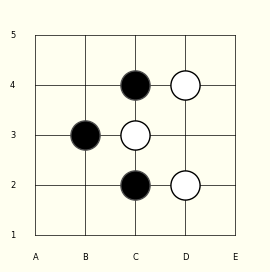

In [18]:
draw_board(*data) # this SVG diagram is saved as a file in the notebook's folder

It's possible to add graphical elements to `data` (cf. `help(intersections)` below):

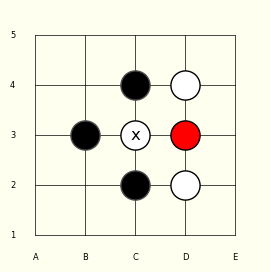

In [19]:
data[2]['red'].append( (3,2) ) # add a red stone
data[3].append( (2,2,'x') )    # add label 'x'
draw_board(*data)

Let's check the API of `intersections`:

In [20]:
help(intersections)

Help on function intersections in module Board:

intersections(grid)
    grid is a multi-string with the board information, like
    
    .  x1 .  o2  .  .
    .  3  .  4  .  .
    .  .  .  .  .  .
    Q  O  #  .  X  .
    
    and returns all information in a format useful to draw_board()
    
    Accepts white pieces (oOQ), black pieces (xX#), and labels
    Other colors must be added by hand   
    
    Eg:
      n_rows, n_cols, stones, labels, markers, coord = intersections(grid)
      stones['red'].append( (1,4) )
      labels.append( (2,3,'♔') )
      draw_board(n_rows, n_cols, stones, labels, markers, coord)



Function `squares` works the same, but places the pieces inside the squares:

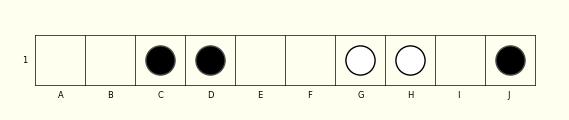

In [21]:
alak = ". . x x . . o o . x"

draw_board(*squares(alak))

A label just at the right of a stone is placed inside:

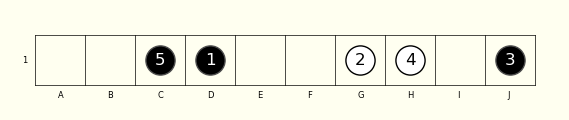

In [22]:
alak = ". . x5 x1 . . o2 o4 . x3"

draw_board(*squares(alak))

Labels can be most unicode characters:

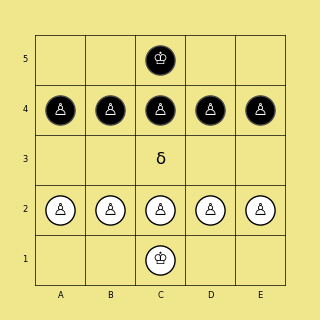

In [23]:
board = """
.   .   x♔ .   .
x♙ x♙ x♙ x♙ x♙
.   .   .δ  .   .
o♙ o♙ o♙ o♙ o♙
.   .   o♔ .   .
"""

draw_board(*squares(board), background='khaki')

### Translating List of Moves

To make it easy to visualize games, there's also function `read_game` that receives a sequence of moves and processes it.

In [24]:
# here moves are separared with spaces, multi-moves must be separated by commas
match = """
d3 h8 b8
d6    c4,b1
b5    e4
f4    f5
c2    h7
g6    h5
h6    e5
g5    e6
e2    e3
e7    d5
f7    f3,g3
"""

The function returns a matrix with the board:

In [25]:
moves = match.split() # split by spaces to make the required sequence of moves
board = read_game(8, 8, moves)
board

[['.  ', 'x3 ', '.  ', '.  ', '.  ', '.  ', '.  ', 'o2 '],
 ['.  ', '.  ', '.  ', '.  ', 'o20', 'o22', '.  ', 'x11'],
 ['.  ', '.  ', '.  ', 'o4 ', 'x17', '.  ', 'o12', 'o14'],
 ['.  ', 'o6 ', '.  ', 'x21', 'x15', 'x9 ', 'o16', 'x13'],
 ['.  ', '.  ', 'x5 ', '.  ', 'x7 ', 'o8 ', '.  ', '.  '],
 ['.  ', '.  ', '.  ', 'x1 ', 'x19', 'x23', 'x23', '.  '],
 ['.  ', '.  ', 'o10', '.  ', 'o18', '.  ', '.  ', '.  '],
 ['.  ', 'x5 ', '.  ', '.  ', '.  ', '.  ', '.  ', '.  ']]

which can be make a string like the previous examples:

In [26]:
print(board2string(board))

.   x3  .   .   .   .   .   o2 
.   .   .   .   o20 o22 .   x11
.   .   .   o4  x17 .   o12 o14
.   o6  .   x21 x15 x9  o16 x13
.   .   x5  .   x7  o8  .   .  
.   .   .   x1  x19 x23 x23 .  
.   .   o10 .   o18 .   .   .  
.   x5  .   .   .   .   .   .  


And this string is something `intersections` and `squares` understand.

All together now:

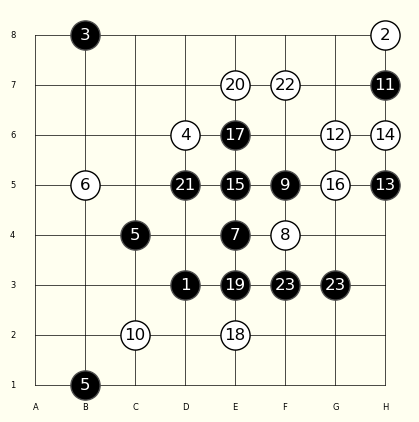

In [27]:
board = board2string(read_game(8, 8, moves))
draw_board(*intersections(board))

In [28]:
help(read_game)

Help on function read_game in module Board:

read_game(n_rows, n_cols, moves, labels=True, players='xo')
    n_rows, 
    n_cols  : size of the board
    moves   : multi-line string with the moves
       moves must be separared with spaces, multi-moves by commas
       capture use ':' (eg: 'a1,b2:c3,d4' )
    labels  : show stone's turn if True, no labels if False
    players : get color of next player



This sequence `read_game` -> `board2string` -> `intersections` -> `draw_board` allows to add details during the process

Notice also that `read_game` has a parameter `players` that allows to redefine what is the order of moving players:

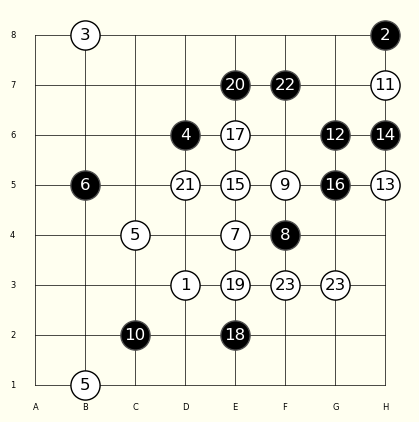

In [29]:
board = board2string(read_game(8, 8, moves, players='ox')) # White starts
draw_board(*intersections(board))

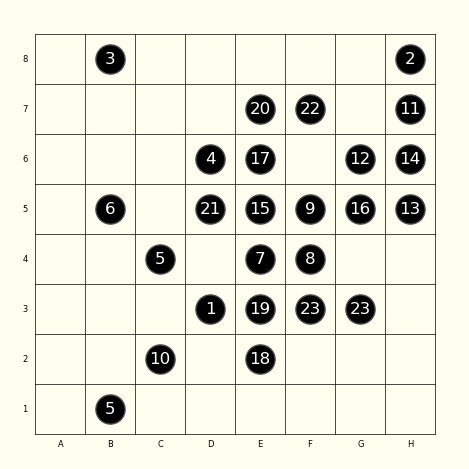

In [30]:
board = board2string(read_game(8, 8, moves, players='x')) # All moves are Black stones
draw_board(*squares(board))

Another example, let's consider this match of unrestricted 122 Gomoku:

             XXXX        OOOO
        00. --- o25     n24 n26
        01. p24 p25     p26 o23
        02. m25 n25     q25 l25
        03. o26 o27     q24 p27
        04. o28 q26     n23 o29
        05. l23 m24     k22 p23
        06. q23 r22     s21 o22
        07. m22 m23     m20 m26
        08. n21 o20     p19 k24
        09. j23 k23     i23 n19
        10. l21 j24     o19 q19
        11. m19 r19     p18 r20  
        12. o17 t22     q17 n20
        13. r16 j22?    p16 p17  
        14. resign
        
        Final Position:
        
        g h i j k l m n o p q r s t u  
        . . . . . . . . . . . . . . . 14
        . . . . . . . . . . . . . . . 15
        . . . . . . . . . O . x . . . 16
        . . . . . . . . x O o . . . . 17
        . . . . . . . . . o . . . . . 18
        . . . . . . x o o o o x . . . 19
        . . . . . . o o x . . o . . . 20
        . . . . . x . x . . . . o . . 21
        . . . x o . x . o . . x . x . 22
        . . o x x x x o o o x . . . . 23
        . . . x o . x o . x o . . . . 24
        . . . . . o x x x x o . . . . 25
        . . . . . . o o x o x . . . . 26
        . . . . . . . . x o . . . . . 27
        . . . . . . . . x . . . . . . 28
        . . . . . . . . o . . . . . . 29
        . . . . . . . . . . . . . . . 30
        . . . . . . . . . . . . . . . 31

Some copy-paste and I have this string:

In [31]:
match = """
     o25     n24,n26
 p24,p25     p26,o23
 m25,n25     q25,l25
 o26,o27     q24,p27
 o28,q26     n23,o29
 l23,m24     k22,p23
 q23,r22     s21,o22
 m22,m23     m20,m26
 n21,o20     p19,k24
 j23,k23     i23,n19
 l21,j24     o19,q19
 m19,r19     p18,r20
 o17,t22     q17,n20
 r16,j22     p16,p17
"""
moves = match.split()

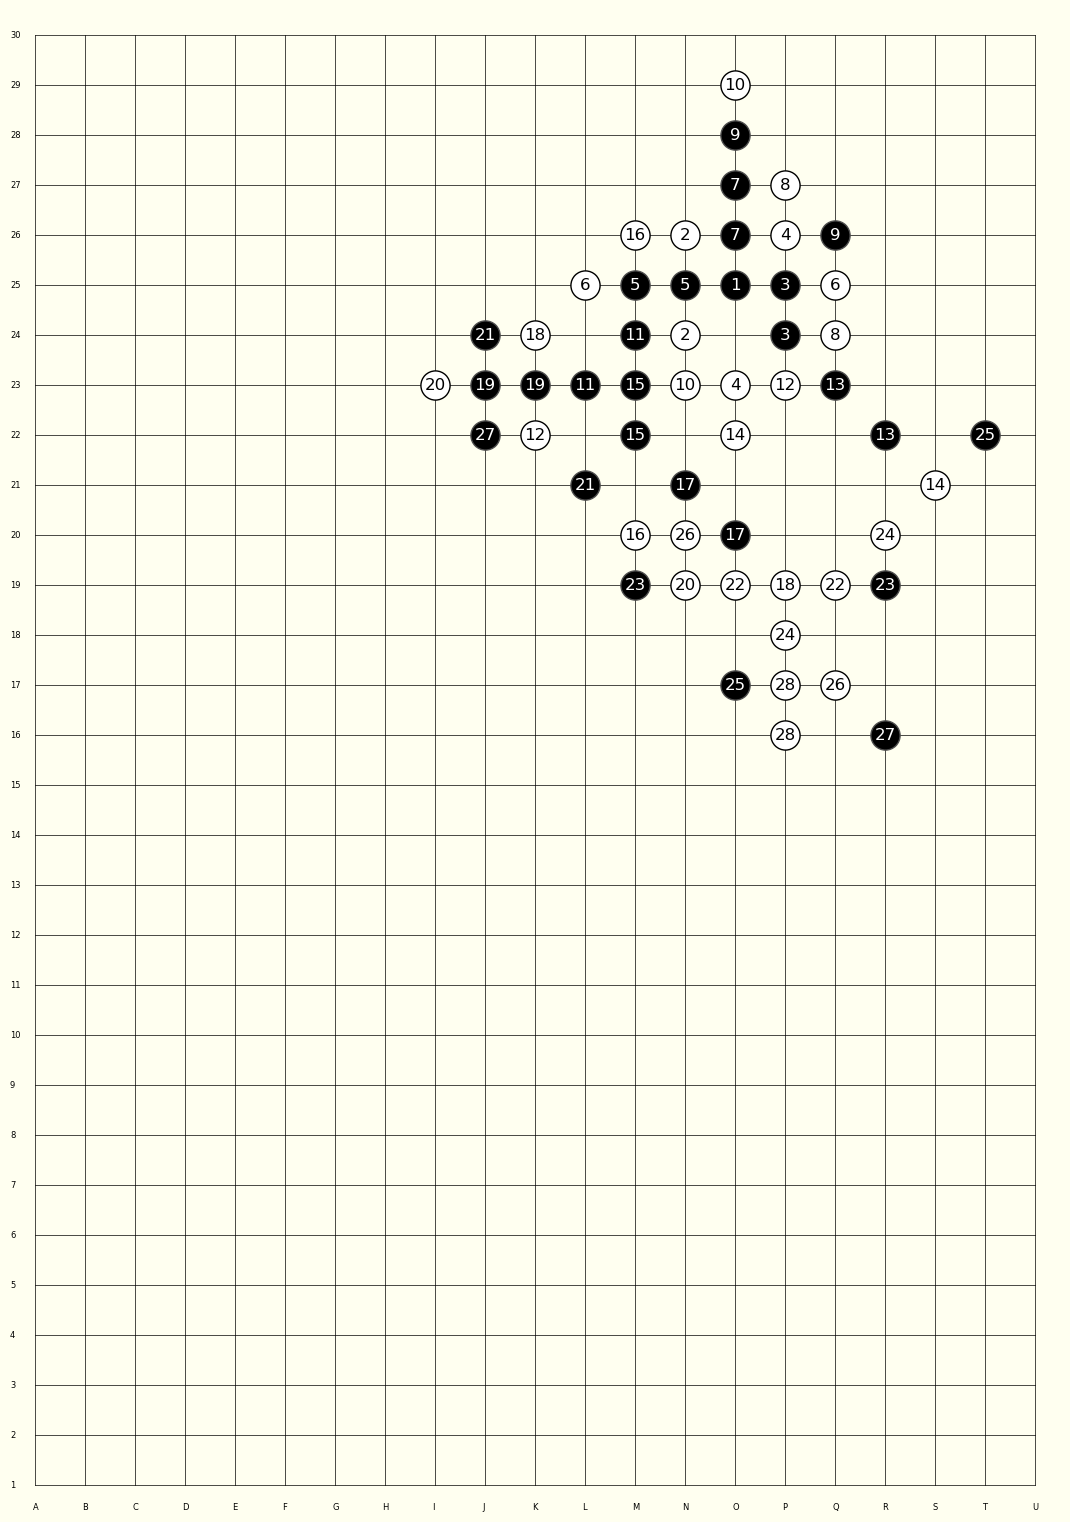

In [32]:
board = board2string(read_game(30, 21, moves))
draw_board(*intersections(board))

### Using the Primitives

It's possible to skip all previous functions, and just construct the `data` directly, to feed `draw_board`. It's more complicated, but allows for more freedom.

Here's an example:

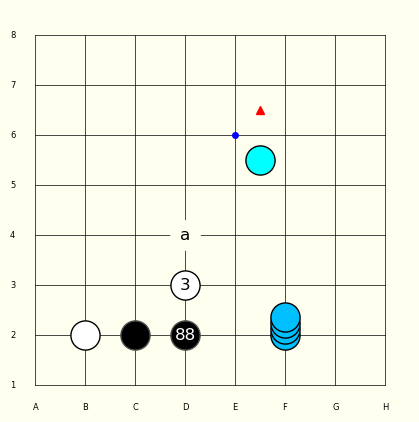

In [34]:
# stones is a dictionary, where each key is a color
stones = {}
stones['white'] = [(3,2), (1,1)] # each pair represents (column, row) of a stone (0-indexed)
stones['black'] = [(2,1), (3,1)]
stones['cyan']  = [(4.5,4.5)]    # ±0.5 values move from/to intersections <-> squares

stones['deepskyblue'] = [(5, 1+.12*h) for h in range(4)] # make a stack

labels = [(3,2,'3'), (3,1,'88'), (3,3,'a')]
# https://matplotlib.org/stable/api/markers_api.html
markers = [(4,5,'blue',8,'o'), (4.5, 5.5, 'red', 12,'^')]  # other special symbols

draw_board(8, 8, stones, labels, markers, coordinates=1) # coordinates=1 for intersections, 2 for squares

These primitives can be used to build new functions that process different types of games.

You need to check the code for more details.

## Hexagonal Boards

There's also a module to deal with hexagonal boards. Its use is a bit different from the orthogonal boards, but the ideas are the same.

In [35]:
from HexagonalBoard import draw_hexboard, hex_coords, read_hex_game

In [36]:
help(draw_hexboard)

Help on function draw_hexboard in module HexagonalBoard:

draw_hexboard(board, *, hexcolor='earth', edgecolor=None, piece_sz=26, label_sz=18, background='ivory', rotate=False, filename='hexboard.svg')
    board : List[(int, int, int, str)]
      Coordinates (x,y,z) of all hexes making the board, 
        plus a string with the piece/label for that coordinate
      Use hex_coords() as a helper function
    hexcolor : str, optional
      The pallete to color fill the board hexes. 
      There are two available 'earth', 'rgb'. 
      Can also pass a single color, eg, 'white'.
      The default is 'earth'.
    edgecolor : str, optional
      The color to draw the hex edges. The default is None.
    piece_sz : the piece's size (default 26)  
    label_sz : the label's size (default 18)  
    backgroud : background color, can be a matplotlib color or a 
                rgb triple, eg (1, 1, .95)
      cf. https://matplotlib.org/stable/gallery/color/named_colors.html        
    rotate :
    

It's harder to define the location of hexes. To deal with this there's function `hex_coords` that is able to translate string descriptions to a format `draw_hexboard` understands:

In [37]:
help(hex_coords)

Help on function hex_coords in module HexagonalBoard:

hex_coords(grid, square_like=False)
    The grid is a multi-string with the description of a hex board:
    
       . . . .
      . x . . .
     . . o x . .
    . . . . . . .
     . . o . r .
      . . . . .
       . . . .
    
    The hex coordinates (x,y,z) will be computed like this:
      
              [0,0,1],    [0,1,0],   [0,2,-1],    [0,3,-2],
           [1,-1,1],   [1,0,0],   [1,1,-1],    [1,2,-2],   [1,3,-3],
        [2,-2,1],  [2,-1,0],   [2,0,-1],    [2,1,-2],  [2,2,-3],  [2,3,-4],
    [3,-3,1],   [3,-2,0],   [3,-1,-1],   [3,0,-2],   [3,1,-3], [3,2,-4],
        [4,-3,0], ...
          [5,-3,-1], ... 
          
    The function returns a list with tuples (x, y, z, label)



Let's check one example:

In [38]:
board = """
   . . . .
  . x . . .
 . . o x . .
. . . . . . .
 . . o . x .
  . . . . .
   . . . .
"""

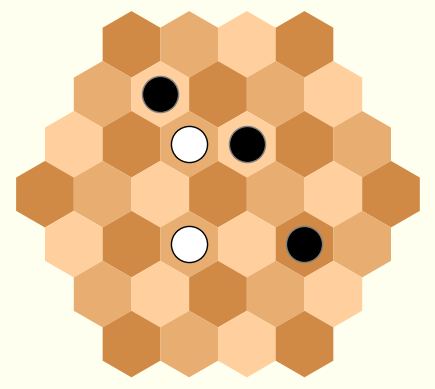

In [39]:
draw_hexboard(hex_coords(board))

We can also add labels to the board (does not have a parameter for extra markers, unlike in ortoghonal boards):

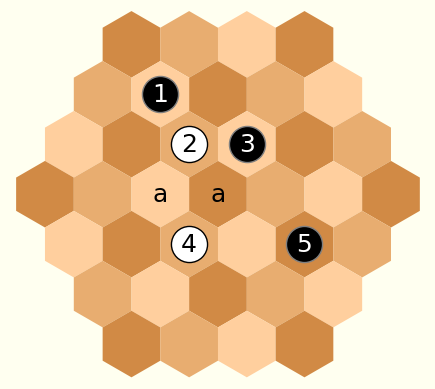

In [40]:
board = """
   . . . .
  . x1 . . .
 . . o2 x3 . .
. . .a .a . . .
 . . o4 . x5 .
  . . . . .
   . . . .
"""
draw_hexboard(hex_coords(board)) 

In hex boards it's possible to add six different colored stones directly on the board:

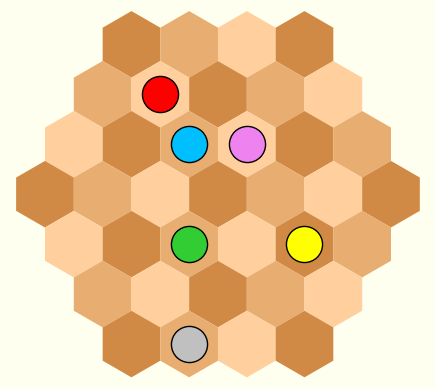

In [41]:
board = """
   . . . .
  . r . . .
 . . l p . .
. . . . . . .
 . . g . y .
  . . . . .
   . s . .
"""
draw_hexboard(hex_coords(board)) 

Also, there are another pattern we can use for the board:

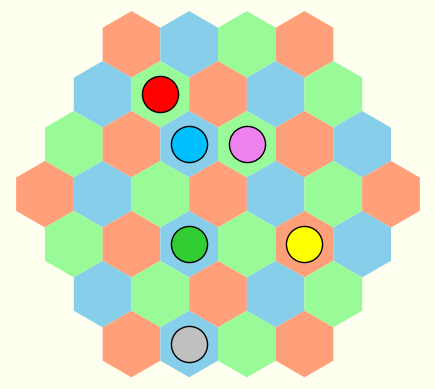

In [42]:
draw_hexboard(hex_coords(board), hexcolor='rgb') 

Or just select one [color](https://matplotlib.org/stable/gallery/color/named_colors.html) for all hexes:

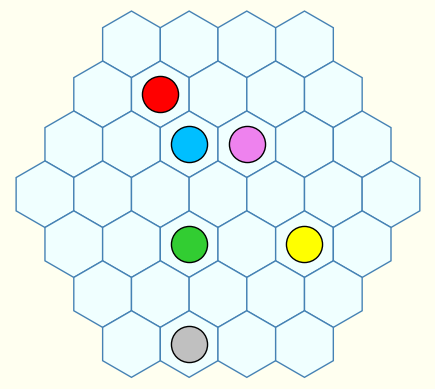

In [43]:
draw_hexboard(hex_coords(board), hexcolor='azure', edgecolor='steelblue') 

It's possible to rotate the board (only to 60 degrees left):

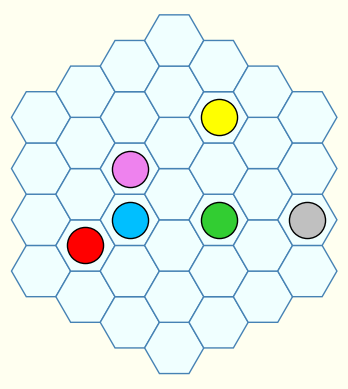

In [44]:
draw_hexboard(hex_coords(board), hexcolor='azure', edgecolor='steelblue', rotate=True) 

And to add hexes manually:

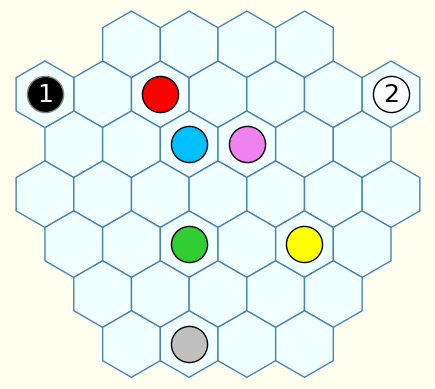

In [45]:
hexes = hex_coords(board)
hexes.extend( [(1,-2,0,'x1'),(1,5,-5,'o2')] )
draw_hexboard(hexes, hexcolor='azure', edgecolor='steelblue') 

`hex_coords` is limited to the amount of hex boards it can represent: regular boards like the previous examples, but also Hex boards:

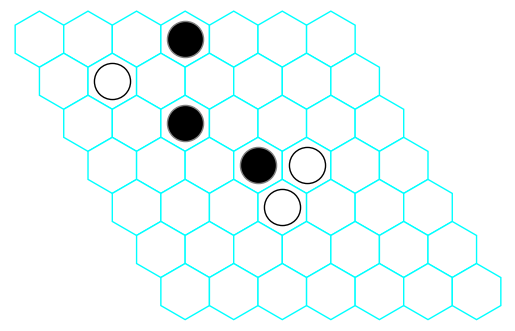

In [46]:
hex = """
   . . . x . . .
    . o . . . . .
     . . x . . . .
      . . . x o . .
       . . . o . . .
        . . . . . . .
         . . . . . . .
"""
draw_hexboard(hex_coords(hex), hexcolor='white', edgecolor='cyan', background=None) 

A bigger example, where there was the need to configure the piece's size:

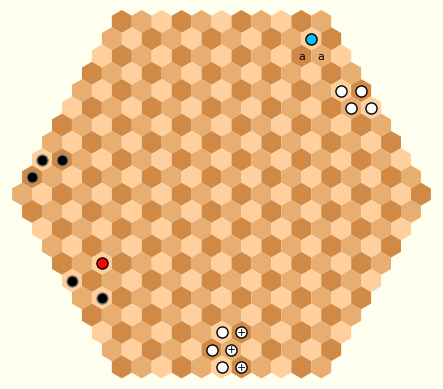

In [47]:
board = """
          . . . . . . . . . . .          
         . . . . . . . . . . l .         
        . . . . . . . . . . .a .a .        
       . . . . . . . . . . . . . .       
      . . . . . . . . . . . . . o o      
     . . . . . . . . . . . . . . o o     
    . . . . . . . . . . . . . . . . .    
   . . . . . . . . . . . . . . . . . .   
  x x . . . . . . . . . . . . . . . . .  
 x . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . .
 . . . . . . . . . . . . . . . . . . . . 
  . . . . . . . . . . . . . . . . . . .  
   . . . . . . . . . . . . . . . . . .   
    . . r . . . . . . . . . . . . . .    
     x . . . . . . . . . . . . . . .     
      . x . . . . . . . . . . . . .      
       . . . . . . . . . . . . . .       
        . . . . . . o o+ . . . . .        
         . . . . . o o+ . . . . .         
          . . . . . o o+ . . . .          
"""

draw_hexboard(hex_coords(board), piece_sz=8, label_sz=8)

### Translating List of Moves

For this task, there's function `hex_game`, with the following API:

In [48]:
help(read_hex_game)

Help on function read_hex_game in module HexagonalBoard:

read_hex_game(size, moves, corner, labels=True, players='xo')
    size    : the hex-board edge size
    moves   : a list of moves made
    corner  : at which coordinate is the top-left corner
    labels  : show stone's turn if True, no labels if False
    players : get color of next player



The function is quite restricted: it assumes a very specific way to represent hex coordinates (see eg below).

As an example, let's say we have this Bluestone match in text format:

    |___abcdefghijklmnopqrstuvwxy      OOO      XXX
    |           @ @ @ @ @ @        1. o4       i7 o7   
    |        @ . x x x o o @       2. n6 j8    h8 n8   
    |       @ x x o o x x o @      3. i9 p6    k7 q7   
    |      @ o o o x o o x o @     4. l8 r12   r6 g9   
    |     @ o x x x . . o o x @    5. p4 h10   r4 n10  
    |    @ x x o o x o o x x o @   6. q5 r2    m5 f10
    |   @ o . . x x o x x . x o    7. p2 s5    o3 t6
    |    @ x . x o o x . . . o @   8. m3 s3    n2 u5
    |     @ . x o . O o x x x @    9. t4 h12   l2 k11  
    |      @ x o . . x . o o @     10 j4 p4    i3 g5   
    |       @ o o x O x . . @      11 h4 h6    g3 i5      
    |        @ o x . x o o @       12 f4 j6    f6 l6
    |           @ @ @ @ @ @        13 e5 c7    d6 d8
    |___abcdefghijklmnopqrstuvwxy  14 i11 r10  s9 j12
                                   15 t10 g11  u9 o11
                                   16 p12 o9   q9 n12
                                   17 v6 v8    l4 u7
                                   18 k3 w7    j2 k5
                                   19 m9 m11   
                                   

Again, I copy-paste the rectangular area with the moves, and make a multi-string with them:

In [49]:
match = """
o4       i7,o7  
n6,j8    h8,n8  
i9,p6    k7,q7  
l8,r12   r6,g9  
p4,h10   r4,n10 
q5,r2    m5,f10
p2,s5    o3,t6
m3,s3    n2,u5
t4,h12   l2,k11 
j4,p4    i3,g5  
h4,h6    g3,i5  
f4,j6    f6,l6
e5,c7    d6,d8
i11,r10  s9,j12
t10,g11  u9,o11
p12,o9   q9,n12
v6,v8    l4,u7
k3,w7    j2,k5
m9,m11   
"""
moves = match.split()

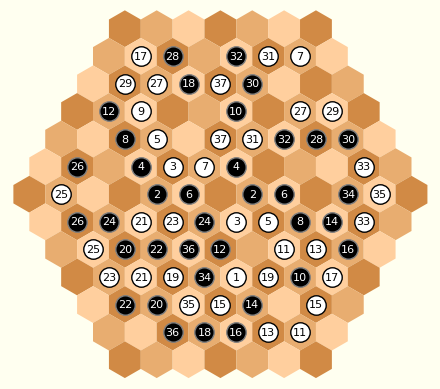

In [50]:
board = read_hex_game(7, moves, corner='h1', players='ox')
draw_hexboard(hex_coords(board2string(board)), piece_sz=14, label_sz=8)

With a bit more work, we can add the blue stones also:

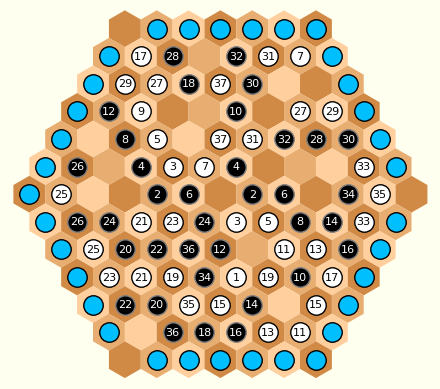

In [51]:
board = read_hex_game(7, moves, corner='h1', players='ox')

for i in range(1,7):
  board[0][i]   = board[12][i]     = 'l' 
  board[i][0]   = board[i][6+i]    = 'l'
  board[6+i][0] = board[6+i][12-i] = 'l'  
board[6][12] = board[12][0] = '.'

draw_hexboard(hex_coords(board2string(board)), piece_sz=14, label_sz=8)

---

### Versions

+ Feb 2 (version 0.1)
    + added stack representation
    + included `player` parameter to class `Sq`
    + list of moves now accept captures, eg `a1,b2:c3,d4`
    + added square-like shapes for hexagonal boards via parameter `square_like`
    + included `hexcolor`, `edgecolor` and `background` parameters to `Hex` class
    + added new color symbols: `n` orange, `c` cyan, `h` chocolat
+ Jan 27
    + added color stones directly on square boards
    + background around the board is now tighter
+ Jan 22, 2025 - version 0